## Airbnb Exploratory Data Analysis

### Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
airbnb_dataset = pd.read_csv('AB_NYC_2019.csv')
airbnb_dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Penjelasan beberapa metrics di atas :
* number_of_reviews adalah total review yang diberikan untuk host_id tertentu.
* last_review mewakili review terbaru dalam bentuk tanggal.
* reviews_per_month mewakili review yang diberikan ke host_id tertentu dalam sebulan.
* calculated_host_listings_count merupakan metrics yang menunjukkan jumlah total apartemen dan kamar tidur yang dirujuk ke pemilik yang sama.
* availability_365 merupakan jumlah hari yang tersedia dari ruangan yang berkaitan dalam setahun.

Label dari setiap kolom :

In [3]:
airbnb_dataset.columns.values

array(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'], dtype=object)

In [4]:
airbnb_dataset.shape

(48895, 16)

Airbnb dataset terdiri dari 48895 baris dan 16 kolom termasuk salah satunya adalah kolom `price`.

In [5]:
airbnb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* Airbnb dataset terdiri dari beberapa tipe data seperti `float64`, `int64`, dan `object`.
* Kolom `id` dan `host_id` bertipe data `int64` sehingga perlu kita convert ke tipe data `object` agar tidak menjadi masalah pada proses selanjutnya, baik Exploratory Data Analysis atau modeling (jika ada).

### Data Cleansing

In [6]:
# Convert id and host_id dtypes to object (str)
airbnb_dataset[['id', 'host_id']] = airbnb_dataset[['id', 'host_id']].astype(str)

In [7]:
airbnb_dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

* Berhubung karena kolom `name`, `host_name`, dan `last_review` tidak akan begitu berdampak terhadap proses Exploratory Data Analysis maka kolom tersebut kita buang dari dataset.
* `reviews_per_month` bisa dihandle dengan mengganti _missing values_ dengan nilai 0. Hal ini dilakukan karena _missing value_ pada kolom tersebut disebabkan oleh `number_of_reviews`-nya bernilai 0 atau tidak ada total review yang diberikan terhadap `host_id` yang berkaitan.

In [8]:
# Drop columns name, host_name, and last_review
airbnb_dataset.drop(['name', 'host_name', 'last_review'], axis=1, inplace=True)

# Impute missing value with 0 in reviews_per_month
airbnb_dataset['reviews_per_month'] = airbnb_dataset['reviews_per_month'].fillna(0)

In [9]:
airbnb_dataset.shape

(48895, 13)

### Exploratory Data Analysis

In [10]:
airbnb_dataset.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### Descriptive Analysis

In [11]:
airbnb_dataset.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Berdasarkan tabel di atas kita mendapatkan beberapa informasi di antaranya ialah :
* Semua kolom kecuali `latitude` dan `longitude` memiliki gap yang jauh antara nilai quartile ketiga dengan nilai `max`-nya.
* Nilai `min` dari `price` adalah 0.
* `calculated_host_listings_count` memiliki nilai `max` sebesar 327. Jaraknya cukup jauh jika dibandingkan dengan data lainnya dengan feature (kolom) yang sama.

#### Distribution of Data

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
airbnb_dataset_num = airbnb_dataset[['latitude', 'longitude', 'price', 'minimum_nights',
                                     'number_of_reviews', 'reviews_per_month',
                                     'calculated_host_listings_count', 'availability_365']].copy()

In [14]:
airbnb_columns_num = airbnb_dataset_num.columns.values

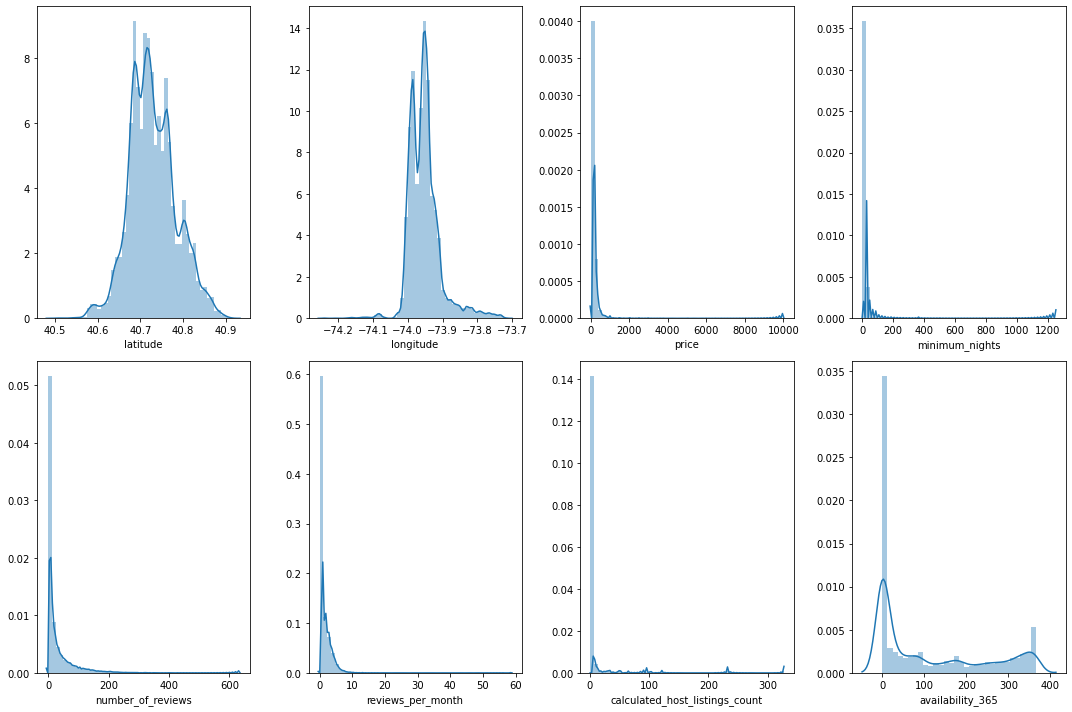

In [15]:
plt.figure(figsize=(15, 10))
for i in range(0,len(airbnb_columns_num)):
    plt.subplot(2, 4, i+1)
    sns.distplot(airbnb_dataset_num[airbnb_columns_num[i]])
    plt.tight_layout()

Dari berbagai macam plot distribusi feature (kolom) numerik, kita dapat menyimpulkan bahwa hampir semua data yang kita miliki itu positif skew termasuk `price`. Kita harus mengecek terlebih dahulu jika data memiliki outliers atau extreme value.

#### Outliers Data

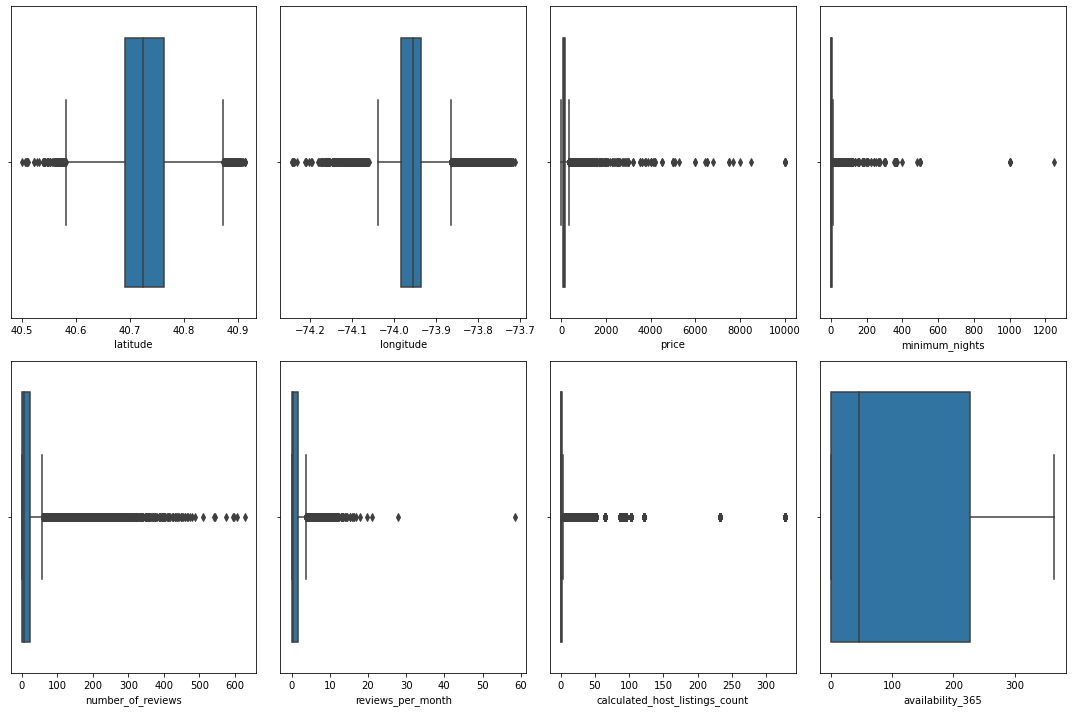

In [16]:
plt.figure(figsize=(15, 10))
for i in range(0,len(airbnb_columns_num)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(airbnb_dataset_num[airbnb_columns_num[i]])
    plt.tight_layout()

Ternyata dari hasil plotingan di atas, semua feature (kolom) khususnya `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, dan `calculated_host_listings_count` memiliki outlier ataupun exterme value. Kita bisa menghandle data tersebut dengan cara membuang nilai outliersnya atau mengganti nilai tersebut dengan nilai lain. Meskipun feature (kolom) `latitude` dan `longitude` memiliki outliers tetapi kita tidak akan melakukan tindakan apapun terhadap feature tersebut. Sementara untuk `availability_365` tidak ada satupun outliers pada feature (kolom) tersebut.

#### Correlation Matrix

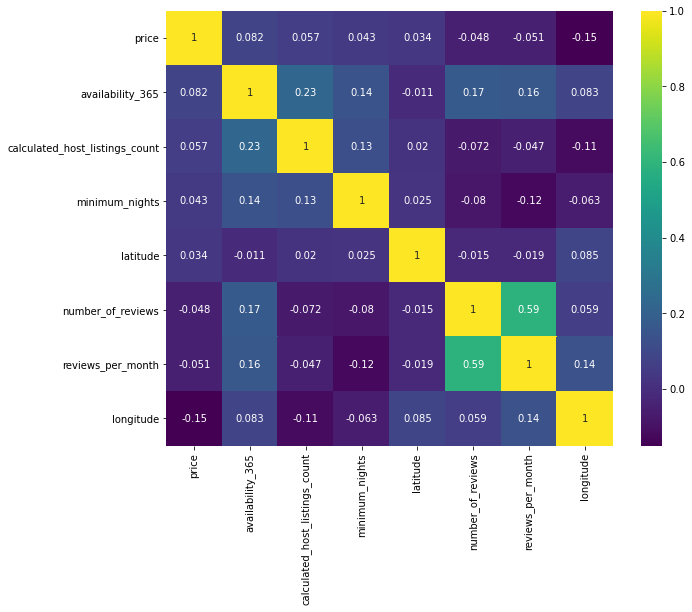

In [17]:
k = 8
cols = airbnb_dataset_num.corr().nlargest(k, 'price')['price'].index
cm = airbnb_dataset_num[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap = 'viridis')

Hasil di atas memperlihatkan bahwa tidak ada hubungan yang kuat antara feature yang satu dengan yang lain termasuk juga feature `price`. Sehingga pada tahap selanjutnya kita tidak akan melakukan proses modeling, tetapi fokus pada proses data analysis dari beberapa feature di dataset tersebut.

Berdasarkan hasil dari **descriptive analysis**, kita dapat mengetahui bahwa feature (kolom) `price` memiliki nilai 0. Oleh karena itu, sebelum masuk ke proses data analysis ada baiknya kita _take out_ data tersebut.

In [18]:
condition = airbnb_dataset[airbnb_dataset['price']==0]
airbnb_dataset = airbnb_dataset.drop(condition.index).reset_index(drop=True)
airbnb_dataset.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


#### Top Host

Proses data analysis yang pertama kita lakukan adalah mencari tahu `host_id` yang paling banyak muncul di dalam dataset tersebut selama tahun 2019.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

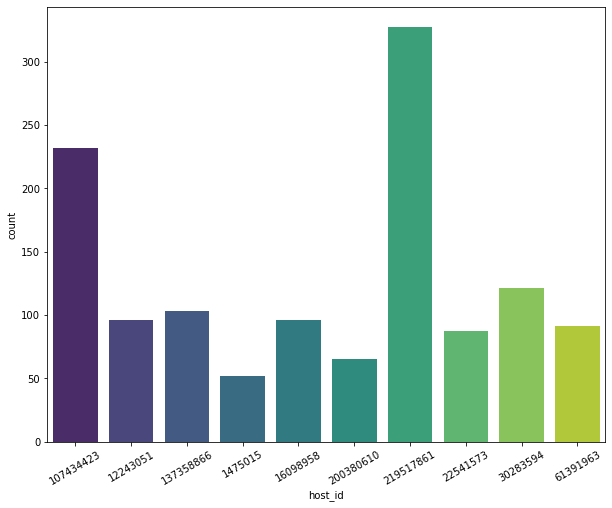

In [19]:
top_host = pd.DataFrame(airbnb_dataset['host_id'].value_counts()).reset_index().head(10)
top_host.rename(columns={'index':'host_id', 'host_id':'count'}, inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(data=top_host, x=top_host['host_id'], y=top_host['count'], palette='viridis')
plt.xticks(rotation=30)

Informasi di atas menampilkan urutan 10 teratas dari `host_id` yang paling banyak muncul di dalam dataset tersebut. Gap yang cukup jauh terlihat antara `host_id` `219517861` sebagai peringkat pertama dan `107434423` sebagai peringkat kedua dengan `host_id` lainnya. Selanjutnya kita coba mengecek dari urutan tiga teratas, masing-masing dari `host_id` tersebut memiliki kamar dengan tipe seperti apa.

In [20]:
# List of top three host_id
list_top_three = ['219517861', '107434423', '30283594']

# Airbnb dataset by host_id and groupby host_id and room_type
# Then count the number of occurences of the room_type
top_three = airbnb_dataset.set_index('host_id')
top_three = top_three.loc[list_top_three].groupby(['host_id', 'room_type'])[['id']].count()
top_three = top_three.rename(columns = {'id':'count'})
top_three

count
host_id   room_type             
107434423 Entire home/apt    232
219517861 Entire home/apt    319
          Private room         8
30283594  Entire home/apt    121

Kesimpulan yang dapat kita tarik dari hasil di atas adalah urutan tiga teratas dari `host_id` yang paling banyak muncul memiliki kamar bertipe `Entire home/apt`.

#### Neighbourhood Group

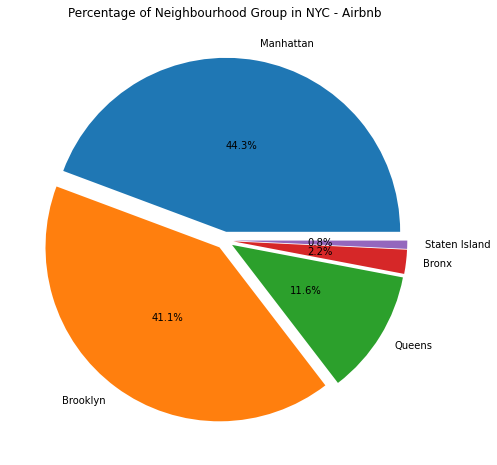

In [21]:
# Count the number of neighbourhood group in NYC Airbnb
ngroup_count = airbnb_dataset['neighbourhood_group'].value_counts()

pie, ax = plt.subplots(figsize=(10,8))
labels = ngroup_count.keys()
plt.pie(x=ngroup_count, autopct='%.1f%%', explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title('Percentage of Neighbourhood Group in NYC - Airbnb')
plt.show()

Setelah mencari tahu `host_id` yang paling banyak muncul atau paling banyak menyewakan kamar di NYC selama tahun 2019 melalui Airbnb. Selanjutnya kita coba cek persentase dari masing-masing `neighbourhood_group`. Ternyata kamar banyak disewakan di dua wilayah yaitu Manhattan dan Brookly dengan persentase masing-masing ialah 44.3% dan 41.1%. 

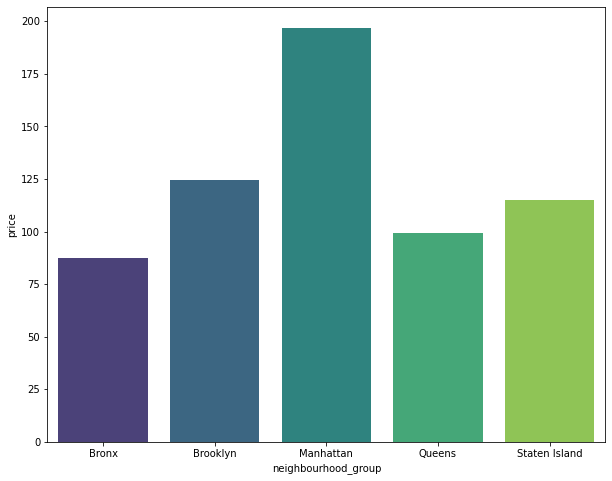

In [22]:
# Airbnb dataset groupby neighbourhood_group with price-mean
ngroup = airbnb_dataset.groupby('neighbourhood_group', as_index=False)[['price']].mean()

plt.figure(figsize=(10,8))
sns.barplot(data=ngroup, x=ngroup['neighbourhood_group'], y=ngroup['price'], palette='viridis')

Sejalan dengan hasil sebelumnya, rataan dari `price` untuk masing-masing wilayah juga menunjukkan bahwa wilayah dengan `price` terbesar ialah Manhattan dan Brooklyn.

#### Room Type

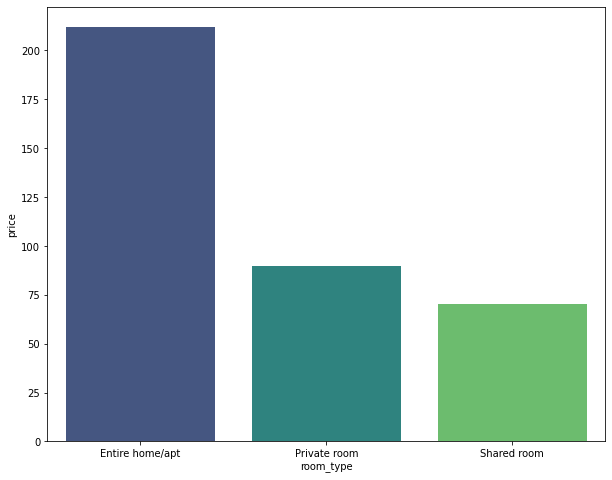

In [23]:
# Airbnb dataset groupby room_type with price-mean
rtype = airbnb_dataset.groupby('room_type', as_index=False)[['price']].mean()

plt.figure(figsize=(10,8))
sns.barplot(data=rtype, x=rtype['room_type'], y=rtype['price'], palette='viridis')

#### Neighbourhood Group x Room Type

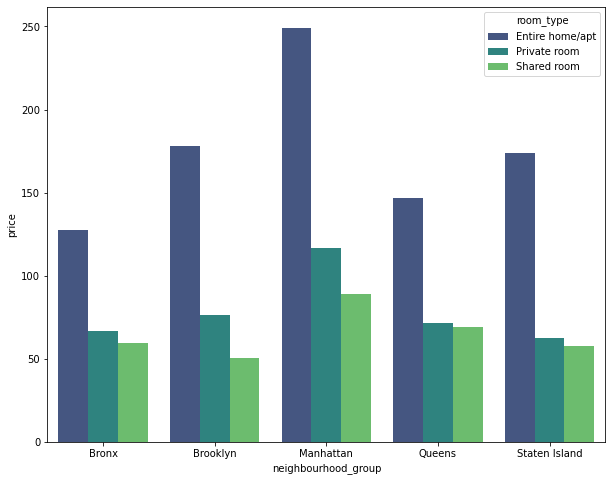

In [24]:
# Stacked bar
# Airbnb dataset groupby neighbourhood_group x room_type with price-mean
n_r_group = pd.DataFrame(airbnb_dataset.groupby(['neighbourhood_group', 'room_type'],
                                                as_index=False)[['price']].mean())

plt.figure(figsize=(10,8))
sns.barplot(data=n_r_group, x=n_r_group['neighbourhood_group'], y=n_r_group['price'],
            hue=n_r_group['room_type'], palette='viridis')

Baik rataan `price` per `room_type` dan rataan `price` per `neighbourhood_group` x `room_type` memiliki hasil yang sama yaitu rataan `price` dari yang paling tinggi ke rendah ialah `room_type` Entire home/apt, Private room, dan Shared room. Selain itu rataan `price` per `neighbourhood_group` x `room_type` juga memperlihatkan bahwa Manhattan merupakan `neighbourhood_group` dengan rataan tertinggi di masing-masing `room_type`-nya jika dibandingkan dengan `neighbourhood_group` lainnya.